In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from scipy.io import loadmat

from network1 import *
from scipy.io import savemat


# System Parameters

In [2]:
n_ab = np.array([[2,2,2],[2,2,2]]) #n_ab = [[na1,na2,na3],[nb1,nb2,nb3]]

M = n_ab.shape[1] #number of systems
N = 500 #number of samples;
sigma = 0.1  #noise standard deviation

obs = [5,6]

# Loading data

In [3]:
e_est = np.load("exp_1/e_single_exp.npy")
r_est = np.load("exp_1/r_single_exp.npy")
x_est = np.load("exp_1/x_single_exp.npy")


e_val = np.load("exp_1/e_validation.npy")
r_val = np.load("exp_1/r_validation.npy")
x_val = np.load("exp_1/x_validation.npy")

##################################################################################################################

### u3

theta_opt_u3 = np.load("exp_1/theta_opt_u3_single_GD_Newton.npy")
costs_opt_u3 = np.load("exp_1/costs_opt_u3_single_GD_Newton.npy")

### u1 and u3

theta_opt_u1u3 = np.load("exp_1/theta_opt_u1u3_single_GD_Newton.npy")
costs_opt_u1u3 = np.load("exp_1/costs_opt_u1u3_single_GD_Newton.npy")


##################################################################################################################

### Real System:
sys1 = signal.zpk2tf([],[-2, -2], 0.5)
sys2 = signal.zpk2tf([],[-0.5, -1.5], 1)
sys3 = signal.zpk2tf([],[-0.5, -0.5], 0.5)


sys1 = signal.cont2discrete(sys1,1)
sys2 = signal.cont2discrete(sys2,1)
sys3 = signal.cont2discrete(sys3,1)

def compute_fit(x_est,x_real):
    return 1-np.linalg.norm(x_real-x_est)/np.linalg.norm(x_real-x_real.mean())


theta_real = np.concatenate([sys1[1][1:],sys1[0][0,1:],sys2[1][1:],sys2[0][0,1:],sys3[1][1:],sys3[0][0,1:]])


In [4]:
len(theta_opt_u1u3),len(theta_opt_u3)

(100, 100)

In [5]:
# REAL:
xo_real,xm_real,_ = get_xoxm(x_val,obs,N,M)

# Plot costs

## u1 and u3

In [6]:
best_i_u3 = costs_opt_u3.argsort()
best_i_u1u3 = costs_opt_u1u3.argsort()

In [7]:
fit_xo_u3 = []
fit_xm_u3 = []
for experiment in best_i_u3:
    a,b = get_ab(theta_opt_u3[experiment],n_ab)

    sys1_est = (np.append(0,b[0]).reshape(-1),np.append([1],a[0]),1)
    sys2_est = (np.append(0,b[1]).reshape(-1),np.append([1],a[1]),1)
    sys3_est = (np.append(0,b[2]).reshape(-1),np.append([1],a[2]),1)
    state_est = gen_states(sys1_est,sys2_est,sys3_est,r_val)
    xo_est,xm_est,_ = get_xoxm(state_est,obs,N,M)
    fit_xo_u3.append(compute_fit(xo_est,xo_real))
    fit_xm_u3.append(compute_fit(xm_est,xm_real))
    
    
fit_xo_u3 = np.array(fit_xo_u3)
fit_xm_u3 = np.array(fit_xm_u3)

/Users/jogal/Library/Python/3.9/lib/python/site-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


In [8]:
fit_xo_u1u3 = []
fit_xm_u1u3 = []
for experiment in best_i_u1u3:
    a,b = get_ab(theta_opt_u1u3[experiment],n_ab)

    sys1_est = (np.append(0,b[0]).reshape(-1),np.append([1],a[0]),1)
    sys2_est = (np.append(0,b[1]).reshape(-1),np.append([1],a[1]),1)
    sys3_est = (np.append(0,b[2]).reshape(-1),np.append([1],a[2]),1)
    state_est = gen_states(sys1_est,sys2_est,sys3_est,r_val)
    xo_est,xm_est,_ = get_xoxm(state_est,obs,N,M)
    fit_xo_u1u3.append(compute_fit(xo_est,xo_real))
    fit_xm_u1u3.append(compute_fit(xm_est,xm_real))
    
    
fit_xo_u1u3 = np.array(fit_xo_u1u3)
fit_xm_u1u3 = np.array(fit_xm_u1u3)

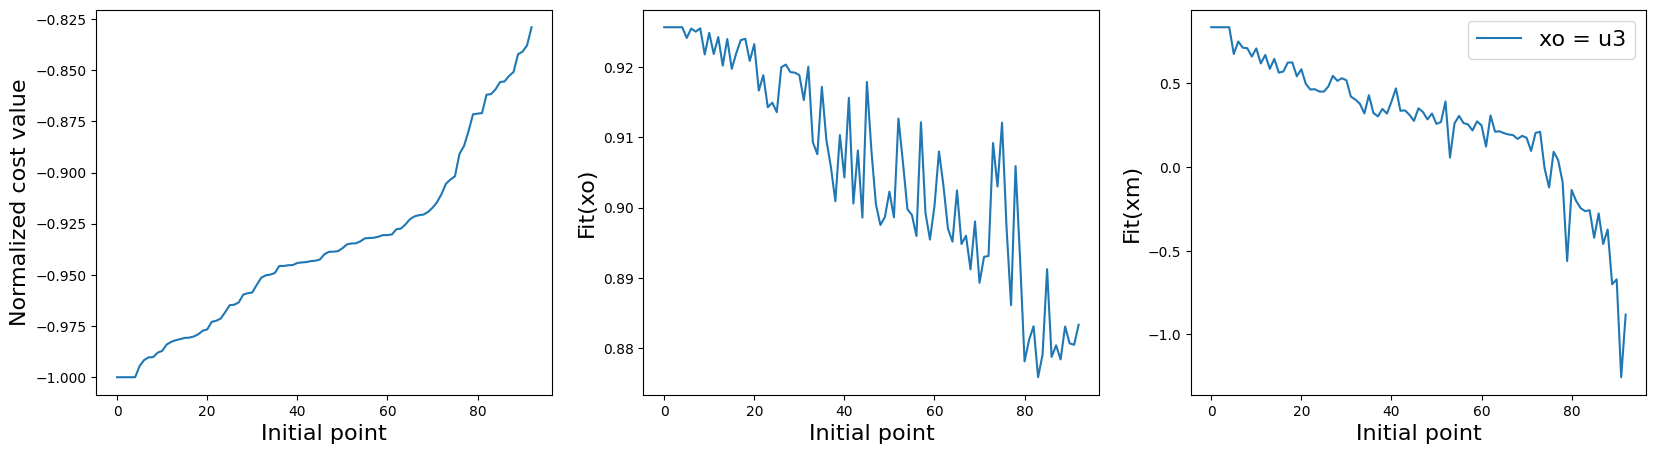

In [9]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(20,5)

ax[0].plot(costs_opt_u3[best_i_u3][fit_xo_u3>-1]/np.abs(costs_opt_u3[best_i_u3][0]))
ax[0].set_xlabel("Initial point",fontsize=16)
ax[0].set_ylabel("Normalized cost value",fontsize=16)

ax[1].plot(fit_xo_u3[fit_xo_u3>-1])
ax[1].set_xlabel("Initial point",fontsize=16)
ax[1].set_ylabel("Fit(xo)",fontsize=16)

ax[2].plot(fit_xm_u3[fit_xo_u3>-1])
ax[2].set_xlabel("Initial point",fontsize=16)
ax[2].set_ylabel("Fit(xm)",fontsize=16)
plt.legend(['xo = u3'],fontsize=16)

plt.savefig("exp_1/results_1.pdf")

In [10]:
fit_xo_u3[0],fit_xo_u1u3[0]

(0.925652318757268, 0.9261737607556021)

In [11]:
fit_xm_u3[0],fit_xm_u1u3[0]

(0.835503545591481, 0.8744490854418698)

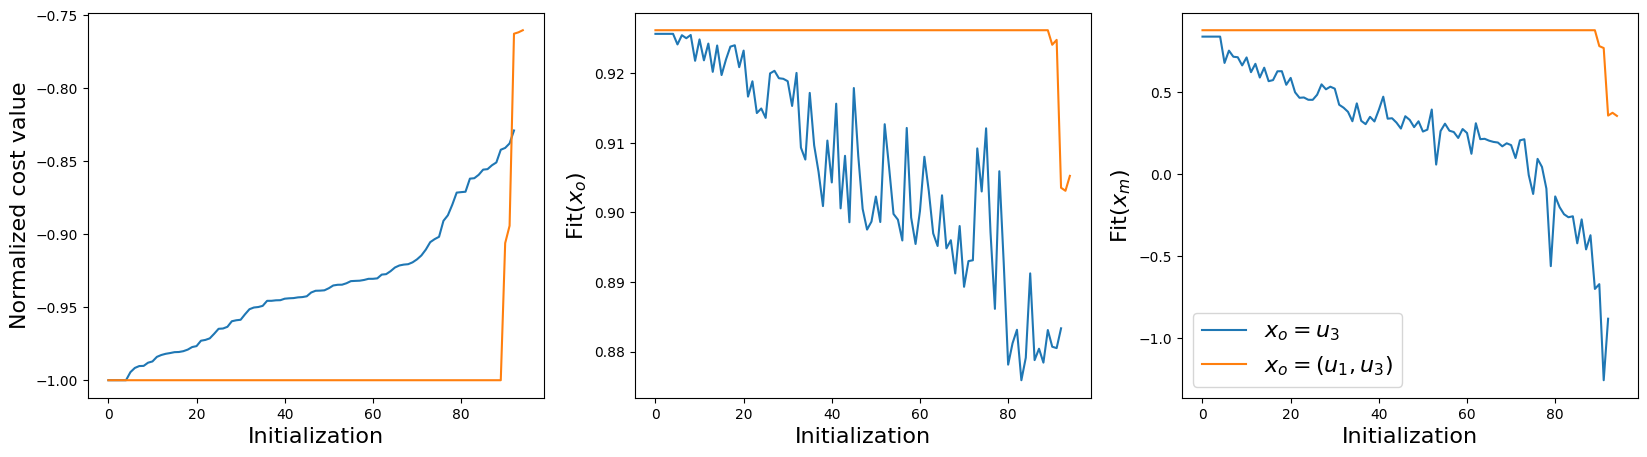

In [14]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(20,5)

ax[0].plot(costs_opt_u3[best_i_u3][fit_xo_u3>-1]/np.abs(costs_opt_u3[best_i_u3][0]))
ax[0].plot(costs_opt_u1u3[best_i_u1u3][fit_xo_u1u3>-1]/np.abs(costs_opt_u1u3[best_i_u1u3][0]))
ax[0].set_xlabel("Initialization",fontsize=16)
ax[0].set_ylabel("Normalized cost value",fontsize=16)

ax[1].plot(fit_xo_u3[fit_xo_u3>-1])
ax[1].plot(fit_xo_u1u3[fit_xo_u1u3>-1])
ax[1].set_xlabel("Initialization",fontsize=16)
ax[1].set_ylabel("Fit($x_o$)",fontsize=16)

ax[2].plot(fit_xm_u3[fit_xo_u3>-1])
ax[2].plot(fit_xm_u1u3[fit_xo_u1u3>-1])
ax[2].set_xlabel("Initialization",fontsize=16)
ax[2].set_ylabel("Fit($x_m$)",fontsize=16)
plt.legend(['$x_o = u_3$','$x_o = (u_1,u_3)$'],fontsize=16)

plt.savefig("exp_1/result_net1.pdf")

# Computing covariances

## Single - u3 and u1

In [15]:
obs = [4,6]
N = 500

Lamb = jnp.array([[0,1,1],[0,0,0],[1,0,0]])
Delta = jnp.eye(3)

n_obs = len(obs)
xo,_,Permut = get_xoxm(x_est,obs,N,M)

A2,B2 = gen_A2B2(Lamb,Delta,Permut,M,N,r_est.reshape(-1,1))
A2o = A2[:,:n_obs*N]
A2m = A2[:,n_obs*N:]
To_phi, Tm_phi, T_gamma, W2, V2 = get_transform_matrices(A2o,A2m,B2)


fisher_mat = fisher_matrix(theta_opt_u1u3[best_i_u1u3[0]],n_ab, Permut, N, M, To_phi, Tm_phi, T_gamma, W2, xo)
cov = np.linalg.inv(fisher_mat)

np.trace(cov),np.max(np.linalg.eigvalsh(cov)),np.linalg.det(cov)

(0.09049659998901802, 0.04880196128734982, 1.2030695683835225e-31)

## Single - u3

In [20]:
obs = [6]
N = 500

n_obs = len(obs)
xo,_,Permut = get_xoxm(x_est,obs,N,M)

A2,B2 = gen_A2B2(Lamb,Delta,Permut,M,N,r_est.reshape(-1,1))
A2o = A2[:,:n_obs*N]
A2m = A2[:,n_obs*N:]
To_phi, Tm_phi, T_gamma, W2, V2 = get_transform_matrices(A2o,A2m,B2)


fisher_mat = fisher_matrix(theta_opt_u3[best_i_u3[0]],n_ab, Permut, N, M, To_phi, Tm_phi, T_gamma, W2, xo)
cov = np.linalg.inv(fisher_mat)

np.trace(cov),np.max(np.linalg.eigvalsh(cov)),np.linalg.det(cov)

(37.69010940699993, 31.63412539450683, 9.12606466905616e-15)